In [1]:
from decomp_simple import read_model
from decomp_simple import get_info
from decomp_simple import decomp_model
from decomp_simple import solve_decomp_with_slack
from decomp_simple import solve_obj_0
from decomp_simple import solve_all_add_slack
import pandas as pd

Read MPS format model from file instances/atm20-100.mps.gz
Reading time = 0.04 seconds
atm20-100: 4380 rows, 6480 columns, 58878 nonzeros
Read MPS format model from file instances/atm20-100.mps.gz
Reading time = 0.04 seconds
atm20-100: 4380 rows, 6480 columns, 58878 nonzeros
Read MPS format model from file instances/atm20-100.mps.gz
Reading time = 0.04 seconds
atm20-100: 4380 rows, 6480 columns, 58878 nonzeros
Read MPS format model from file instances/atm20-100.mps.gz
Reading time = 0.05 seconds
atm20-100: 4380 rows, 6480 columns, 58878 nonzeros
Set parameter Seed to value 77
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (mac64[x86])
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 4380 rows, 6480 columns and 58878 nonzeros
Model fingerprint: 0x112d3696
Variable types: 4260 continuous, 2220 integer (2220 binary)
Coefficient statistics:
  Matrix range     [1e-01, 1e+04]
  Objective range  [0e+00, 0e+00]
  Bounds range     [1e+00, 6e+03]


<ipython-input-2-c9e502be89f1>:16: DeprecationWarning: Deprecated, pass a TempConstr or use Model.addLConstr
  all_add_slack_time, all_add_slack_status  = solve_all_add_slack(A, vars, SENSE, RHS)


Set parameter Seed to value 77
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (mac64[x86])
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 4380 rows, 12900 columns and 65298 nonzeros
Model fingerprint: 0xad64dd58
Variable types: 10680 continuous, 2220 integer (2220 binary)
Coefficient statistics:
  Matrix range     [1e-01, 1e+04]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 6e+03]
  RHS range        [1e+00, 5e+04]
Found heuristic solution: objective 2418826.0000
Presolve time: 0.16s
Presolved: 4380 rows, 12900 columns, 65298 nonzeros
Variable types: 10660 continuous, 2240 integer (2220 binary)

Root relaxation: objective 0.000000e+00, 2537 iterations, 0.16 seconds (0.17 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0  123 2418826.00    0.00000   100%     -    0s
H    0     0    

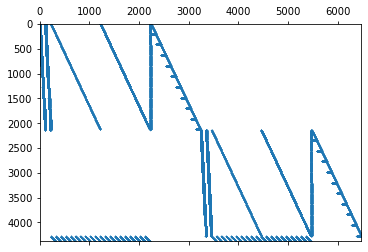

<ipython-input-2-c9e502be89f1>:24: DeprecationWarning: Deprecated, pass a TempConstr or use Model.addLConstr
  feasibility_time, feasibility_status = solve_decomp_with_slack(A, vars, RHS, SENSE, add_slack)


Set parameter Seed to value 77
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (mac64[x86])
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 4380 rows, 12800 columns and 65198 nonzeros
Model fingerprint: 0xffd7394c
Variable types: 10580 continuous, 2220 integer (2220 binary)
Coefficient statistics:
  Matrix range     [1e-01, 1e+04]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 6e+03]
  RHS range        [1e+00, 5e+04]
Found heuristic solution: objective 2418826.0000
Presolve time: 0.07s
Presolved: 4380 rows, 12800 columns, 65198 nonzeros
Variable types: 10560 continuous, 2240 integer (2220 binary)

Root relaxation: objective 0.000000e+00, 3128 iterations, 0.20 seconds (0.25 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0  152 2418826.00    0.00000   100%     -    0s
H    0     0    

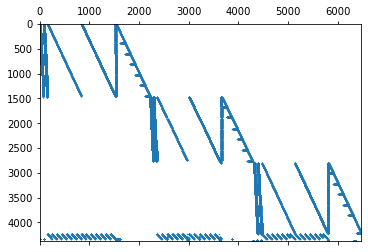

Set parameter Seed to value 77
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (mac64[x86])
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 4380 rows, 12698 columns and 65096 nonzeros
Model fingerprint: 0x3ad36857
Variable types: 10478 continuous, 2220 integer (2220 binary)
Coefficient statistics:
  Matrix range     [1e-01, 1e+04]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 6e+03]
  RHS range        [1e+00, 5e+04]
Found heuristic solution: objective 2397077.0000
Presolve removed 12 rows and 24 columns
Presolve time: 0.12s
Presolved: 4368 rows, 12674 columns, 65048 nonzeros
Variable types: 10442 continuous, 2232 integer (2214 binary)

Root relaxation: objective 0.000000e+00, 2901 iterations, 0.18 seconds (0.18 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0  147 2397077.00    0.0

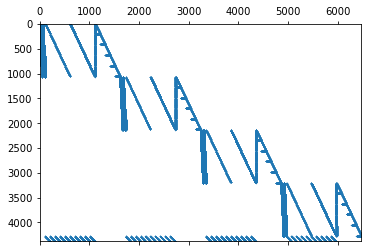

Set parameter Seed to value 77
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (mac64[x86])
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 4380 rows, 12800 columns and 65198 nonzeros
Model fingerprint: 0xffd7394c
Variable types: 10580 continuous, 2220 integer (2220 binary)
Coefficient statistics:
  Matrix range     [1e-01, 1e+04]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 6e+03]
  RHS range        [1e+00, 5e+04]
Found heuristic solution: objective 2418826.0000
Presolve time: 0.09s
Presolved: 4380 rows, 12800 columns, 65198 nonzeros
Variable types: 10560 continuous, 2240 integer (2220 binary)

Root relaxation: objective 0.000000e+00, 3128 iterations, 0.23 seconds (0.25 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0  152 2418826.00    0.00000   100%     -    0s
H    0     0    

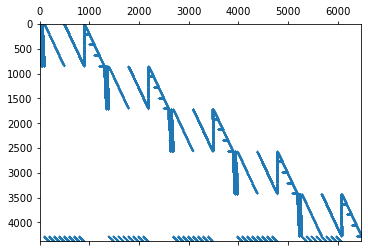

Set parameter Seed to value 77
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (mac64[x86])
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 4380 rows, 12800 columns and 65198 nonzeros
Model fingerprint: 0xffd7394c
Variable types: 10580 continuous, 2220 integer (2220 binary)
Coefficient statistics:
  Matrix range     [1e-01, 1e+04]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 6e+03]
  RHS range        [1e+00, 5e+04]
Found heuristic solution: objective 2418826.0000
Presolve time: 0.08s
Presolved: 4380 rows, 12800 columns, 65198 nonzeros
Variable types: 10560 continuous, 2240 integer (2220 binary)

Root relaxation: objective 0.000000e+00, 3128 iterations, 0.21 seconds (0.25 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0  152 2418826.00    0.00000   100%     -    0s
H    0     0    

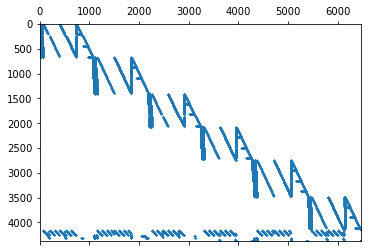

Set parameter Seed to value 77
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (mac64[x86])
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 4380 rows, 12561 columns and 64959 nonzeros
Model fingerprint: 0x2006eccf
Variable types: 10341 continuous, 2220 integer (2220 binary)
Coefficient statistics:
  Matrix range     [1e-01, 1e+04]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 6e+03]
  RHS range        [1e+00, 5e+04]
Found heuristic solution: objective 2356402.0000
Presolve removed 22 rows and 44 columns
Presolve time: 0.15s
Presolved: 4358 rows, 12517 columns, 64871 nonzeros
Variable types: 10291 continuous, 2226 integer (2209 binary)

Root relaxation: objective 0.000000e+00, 2797 iterations, 0.27 seconds (0.17 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0  138 2356402.00    0.0

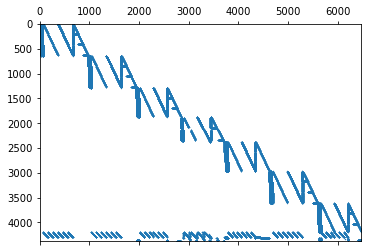

Set parameter Seed to value 77
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (mac64[x86])
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 4380 rows, 12639 columns and 65037 nonzeros
Model fingerprint: 0x7af7b3ab
Variable types: 10419 continuous, 2220 integer (2220 binary)
Coefficient statistics:
  Matrix range     [1e-01, 1e+04]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 6e+03]
  RHS range        [1e+00, 5e+04]
Found heuristic solution: objective 2374556.0000
Presolve removed 20 rows and 40 columns
Presolve time: 0.16s
Presolved: 4360 rows, 12599 columns, 64957 nonzeros
Variable types: 10374 continuous, 2225 integer (2210 binary)

Root relaxation: objective 0.000000e+00, 2947 iterations, 0.20 seconds (0.20 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0  160 2374556.00    0.0

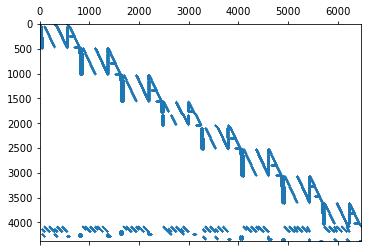

Set parameter Seed to value 77
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (mac64[x86])
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 4380 rows, 12404 columns and 64802 nonzeros
Model fingerprint: 0x6bf09c87
Variable types: 10184 continuous, 2220 integer (2220 binary)
Coefficient statistics:
  Matrix range     [1e-01, 1e+04]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 6e+03]
  RHS range        [1e+00, 5e+04]
Found heuristic solution: objective 2316012.0000
Presolve removed 40 rows and 81 columns
Presolve time: 0.11s
Presolved: 4340 rows, 12323 columns, 64640 nonzeros
Variable types: 10107 continuous, 2216 integer (2200 binary)

Root relaxation: objective 0.000000e+00, 2891 iterations, 0.15 seconds (0.18 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0  134 2316012.00    0.0

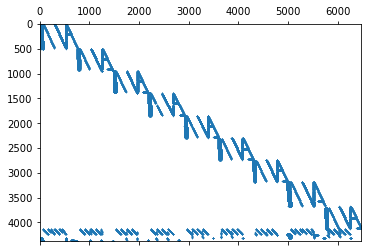

Set parameter Seed to value 77
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (mac64[x86])
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 4380 rows, 12512 columns and 64910 nonzeros
Model fingerprint: 0xe1fd79d9
Variable types: 10292 continuous, 2220 integer (2220 binary)
Coefficient statistics:
  Matrix range     [1e-01, 1e+04]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 6e+03]
  RHS range        [1e+00, 5e+04]
Found heuristic solution: objective 2350339.2000
Presolve removed 20 rows and 41 columns
Presolve time: 0.11s
Presolved: 4360 rows, 12471 columns, 64828 nonzeros
Variable types: 10245 continuous, 2226 integer (2210 binary)

Root relaxation: objective 0.000000e+00, 2592 iterations, 0.14 seconds (0.15 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0  145 2350339.20    0.0

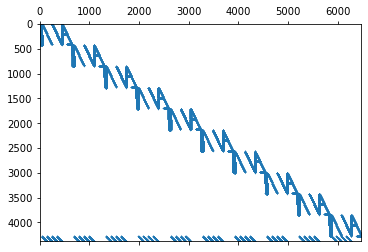

Set parameter Seed to value 77
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (mac64[x86])
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 4380 rows, 12800 columns and 65198 nonzeros
Model fingerprint: 0xffd7394c
Variable types: 10580 continuous, 2220 integer (2220 binary)
Coefficient statistics:
  Matrix range     [1e-01, 1e+04]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 6e+03]
  RHS range        [1e+00, 5e+04]
Found heuristic solution: objective 2418826.0000
Presolve time: 0.07s
Presolved: 4380 rows, 12800 columns, 65198 nonzeros
Variable types: 10560 continuous, 2240 integer (2220 binary)

Root relaxation: objective 0.000000e+00, 3128 iterations, 0.19 seconds (0.25 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0  152 2418826.00    0.00000   100%     -    0s
H    0     0    

,instance,Number of blocks,Hypergraph type,Num linking cons,Largest block,Smallest block,Linking constraint add slack time,Linking constraint add slack status,Obj to 0 time,Obj to 0 status,All add slack time,All add slack status
0,atm20-100,2,r,4280,3240,3240,183.177577,2,145.24913,2,187.92302,2
0,atm20-100,3,r,4228,2223,2094,745.664396,2,145.24913,2,187.92302,2
0,atm20-100,4,r,4280,1620,1620,201.579418,2,145.24913,2,187.92302,2
0,atm20-100,5,r,4280,1296,1296,190.661781,2,145.24913,2,187.92302,2
0,atm20-100,6,r,4159,1119,1044,193.548432,2,145.24913,2,187.92302,2
0,atm20-100,7,r,4197,972,880,60.465419,2,145.24913,2,187.92302,2
0,atm20-100,8,r,4080,825,795,49.533597,2,145.24913,2,187.92302,2
0,atm20-100,9,r,4134,759,684,44.673409,2,145.24913,2,187.92302,2
0,atm20-100,10,r,4280,648,648,158.251336,2,145.24913,2,187.92302,2


In [2]:
#instance = ['10teams','bab5', '22433']
instance = ['atm20-100']
nBlocks_lst = [2,3,4,5,6,7,8,9,10]
HGtype = 'r' # hypergraph type: 'r' row-net

first = True
result_all = pd.DataFrame()
for i in range(len(instance)):
    first = True
    for nBlocks in nBlocks_lst:
        if nBlocks == 2 and first:
            m, m_new, m_new1, m_new2 = read_model(instance[i])
            A, x, con, sizeA, nonzeros, RHS, SENSE, vars = get_info(m)
            
            obj_to_0_time, obj_to_0_status  = solve_obj_0(m_new1)
            all_add_slack_time, all_add_slack_status  = solve_all_add_slack(A, vars, SENSE, RHS)
            first = False
            print('Obj to 0 solving time:', obj_to_0_time)
            print('All adding slack variable solving time:', all_add_slack_time)
            
            #continue
            
        add_slack, num_linking_cons, lowest_count, highest_count = decomp_model(A, sizeA, con, nonzeros, vars, HGtype, instance[i], nBlocks)
        feasibility_time, feasibility_status = solve_decomp_with_slack(A, vars, RHS, SENSE, add_slack)
        
        print('Linking Constraint Feasibility Problem solving time:', feasibility_time)
        result = pd.DataFrame()
        result['instance'] = [instance[i]]
        result['Number of blocks'] = [nBlocks]
        result['Hypergraph type'] = [HGtype]
        result['Num linking cons'] = [num_linking_cons]
        result['Largest block'] = [highest_count]
        result['Smallest block'] = [lowest_count]
        result['Linking constraint add slack time'] = [feasibility_time]
        result['Linking constraint add slack status'] = [feasibility_status]
        result['Obj to 0 time'] = [obj_to_0_time]
        result['Obj to 0 status'] = [obj_to_0_status]
        result['All add slack time'] = [all_add_slack_time]
        result['All add slack status'] = [all_add_slack_status]
        result_all = pd.concat([result_all, result])
        
result_all

In [6]:
result_all

,instance,Number of blocks,Hypergraph type,Num linking cons,Largest block,Smallest block,Linking constraint add slack time,Linking constraint add slack status,Obj to 0 time,Obj to 0 status,All add slack time,All add slack status
0,atm20-100,2,r,4280,3240,3240,56.549696,2,5045.4902,2,93.681098,2
0,atm20-100,3,r,4230,2223,2088,101.281098,2,5045.4902,2,93.681098,2
0,atm20-100,4,r,4280,1620,1620,56.523796,2,5045.4902,2,93.681098,2
0,atm20-100,5,r,4280,1296,1296,56.542949,2,5045.4902,2,93.681098,2
0,atm20-100,6,r,4160,1119,1044,91.599219,2,5045.4902,2,93.681098,2
0,atm20-100,7,r,4177,972,881,52.075019,2,5045.4902,2,93.681098,2
0,atm20-100,8,r,4078,825,795,101.057349,2,5045.4902,2,93.681098,2
0,atm20-100,9,r,4134,759,684,100.615520,2,5045.4902,2,93.681098,2
0,atm20-100,10,r,4280,648,648,57.088893,2,5045.4902,2,93.681098,2
